<a href="https://colab.research.google.com/github/Sadikshya-dhakal/AI/blob/main/lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**NumPy and Pandas** are used for numerical computations and data manipulation.

**Matplotlib and Seaborn** are used for data visualization.

**Warnings** are suppressed to keep the output clean.

**Scikit-learn** tools are used to split the dataset, standardize features, train a Logistic Regression model, and evaluate its performance using metrics such as accuracy, precision, recall, F1-score, confusion matrix, and ROC–AUC curve.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import(
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)



This code builds a **Logistic Regression model** using the **Titanic dataset** to predict passenger survival. First, relevant features are selected and missing values are handled by filling numerical data with the median and categorical data with the mode. Categorical variables such as sex and embarkation port are converted into numerical form using one-hot encoding. The dataset is then split into training and testing sets with stratified sampling. Feature scaling is applied using StandardScaler to improve model performance. The Logistic Regression model is trained on the scaled training data, and predictions are made on both training and test sets. Finally, the model’s performance is evaluated using accuracy, precision, recall, F1-score, ROC–AUC score, and a detailed classification report.


In [2]:
titanic=sns.load_dataset("titanic")
df=titanic[
    ["survived", "pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]
]
print("Initial Dataset shape", df.shape)
print("\nmissing values:\n", df.isnull().sum())

Initial Dataset shape (891, 8)

missing values:
 survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64


In [3]:
df["age"].fillna(df["age"].median(),inplace=True)
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

/tmp/ipython-input-2647494238.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(),inplace=True)
/tmp/ipython-input-2647494238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"].fillna(df["age"].median(),inplace=True)
/tmp/ipython-input-2647494238.py:2: FutureWarning: A value is trying to be set on

In [4]:
df.dropna(subset=["survived"], inplace=True)

/tmp/ipython-input-3170825855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=["survived"], inplace=True)


In [5]:
df_encoded=pd.get_dummies(
    df, columns=["sex", "embarked"], drop_first=True
)

In [6]:
x=df_encoded.drop("survived", axis=1)
y=df_encoded["survived"]
print("\nFinal Feature Set:")
print(x.head())


Final Feature Set:
   pclass   age  sibsp  parch     fare  sex_male  embarked_Q  embarked_S
0       3  22.0      1      0   7.2500      True       False        True
1       1  38.0      1      0  71.2833     False       False       False
2       3  26.0      0      0   7.9250     False       False        True
3       1  35.0      1      0  53.1000     False       False        True
4       3  35.0      0      0   8.0500      True       False        True


In [7]:
x_train, x_test, y_train, y_test = train_test_split(
    x,y,
  test_size=0.25,
    random_state=42,
    stratify=y
)

In [8]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:
log_reg = LogisticRegression(
    solver="liblinear",
    max_iter=1000,
    random_state=42
)

In [10]:

log_reg.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [11]:
y_train_pred = log_reg.predict(x_train_scaled)
y_test_pred = log_reg.predict(x_test_scaled)
y_test_prob = log_reg.predict_proba(x_test_scaled)[:, 1]

In [12]:
print("\n=== TRAINING PERFORMANCE ===")
print("accuracy:", accuracy_score(y_train, y_train_pred))

print("\n=== TESTING PERFORMANCE ===")
print("accuracy:", accuracy_score(y_test, y_test_pred))
print("precision:", precision_score(y_test, y_test_pred))
print("recall:", recall_score(y_test, y_test_pred))
print("f1 score:", f1_score(y_test, y_test_pred))
print("roc auc score:", roc_auc_score(y_test, y_test_prob))
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))


=== TRAINING PERFORMANCE ===
accuracy: 0.8068862275449101

=== TESTING PERFORMANCE ===
accuracy: 0.7713004484304933
precision: 0.7108433734939759
recall: 0.686046511627907
f1 score: 0.6982248520710059
roc auc score: 0.8400526226447124

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       137
           1       0.71      0.69      0.70        86

    accuracy                           0.77       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.77      0.77       223





This code evaluates the Logistic Regression model using a confusion matrix and ROC curve to measure classification performance and class separation. It also displays feature coefficients, showing which factors most strongly increase or decrease the probability of survival on the Titanic.


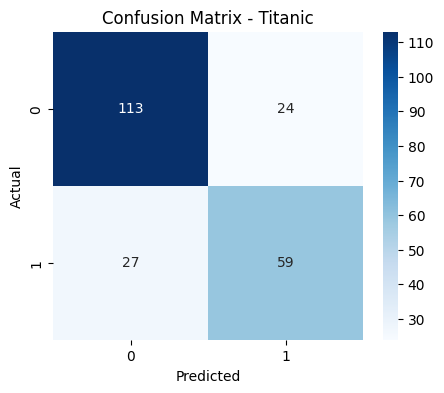

In [13]:
cm=confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Titanic")
plt.show()

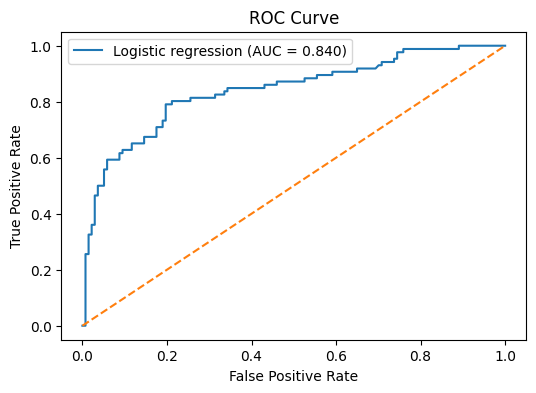

In [14]:
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="Logistic regression (AUC = {:.3f})".format(
    roc_auc_score(y_test, y_test_prob)
))
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [15]:
coeff_df = pd.DataFrame({
    "Feature": x.columns,
    "Coefficient": log_reg.coef_[0]
}).sort_values(by="Coefficient", ascending = False)
print("\nFeature Importance(Coefficients):")
print(coeff_df)


Feature Importance(Coefficients):
      Feature  Coefficient
4        fare     0.131406
6  embarked_Q     0.079575
3       parch    -0.035564
7  embarked_S    -0.156244
2       sibsp    -0.251905
1         age    -0.523409
0      pclass    -0.930416
5    sex_male    -1.259053


The Logistic Regression model performed effectively on the Titanic dataset, showing good predictive performance and clear class separation. The confusion matrix, ROC–AUC score, and feature coefficients confirm that the model is reliable and interpretable for survival prediction.